# Large

In [13]:
from src.Utils import save_results, get_means
from src.Dataset import dataset_csv
from src.ExistingAlgorithms import area, sklearn_available
from src.GaussianMixture import gaussian_mixture
from src.Parametric_UMAP import load_pumap

from sklearn.decomposition import PCA
import torch
import umap
import numpy as np

SKIP = 2
PATH_INIT_MEANS = 'Preprocess/Large/Mean_Clusters'
PATH_SAVE_LD = 'Preprocess/Large/Low_Dimension'
PATH_DATA = 'Dataset/Data_Ottawa/data.zip'
PATH_RESULTS = 'Results/Large'
PATH_SAVE_D = 'Results/Large/Density'

## Load Data

In [14]:
data_train, data_test = dataset_csv(
   PATH_DATA,
   SKIP = SKIP
)

In [15]:
data_test.shape

(275000, 200)

### AREA

In [16]:
X_AREA  = area(
   X_high = data_test+1, 
   filtering = True, 
   plot_filter = True, 
   threshold = 0.01, 
   critical_frequency = 0.1,
   save_path = PATH_SAVE_LD
)

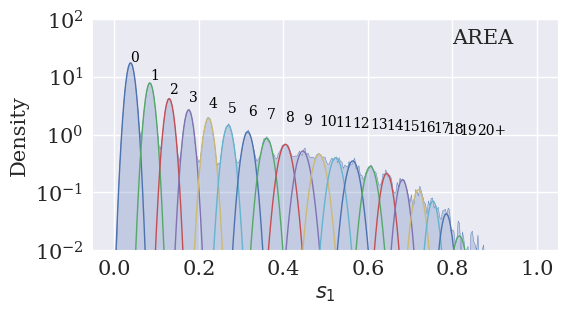

In [17]:
name_method = 'AREA'
gm = gaussian_mixture(
   X_AREA[::SKIP],
   data_test,
   number_cluster = 21,
   cluster_iter = 3,
   means_init = get_means(name_method, PATH_INIT_MEANS),
   tol = 1e-4,
   info_sweep = 0,
   plot_sweep = True
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

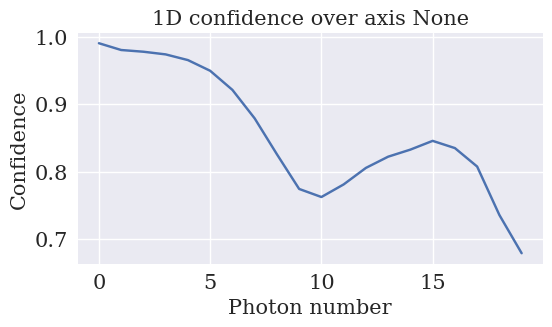

In [18]:
gm.plot_confidence_1d(expected_prob = None)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Parametric UMAP

In [19]:
data_test.shape

(275000, 200)

In [20]:
model = load_pumap('src/Parametric_UMAP/model 1D/modelLarge.ckpt').to('cpu')
BATCH = 10
X_PUMAP = np.zeros((data_test.shape[0], 1))

for b in range(BATCH):
   X_PUMAP[b::BATCH] = model.encoder(torch.from_numpy(data_test[b::BATCH]).view(-1,200).to(dtype=torch.float)).detach().numpy()

/home/nicolasdc/miniconda3/envs/ML/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.


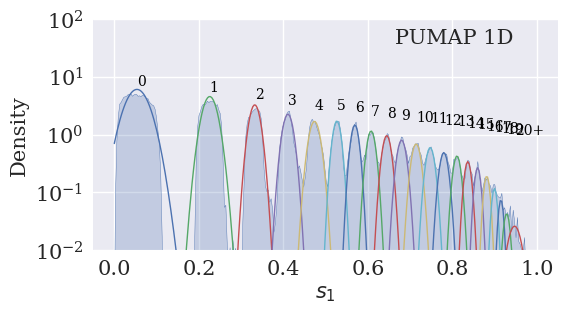

In [21]:
name_method = 'PUMAP 1D'
gm = gaussian_mixture(
   X_PUMAP,
   data_test,
   number_cluster = 21,
   cluster_iter = 5,
   means_init = get_means(name_method, PATH_INIT_MEANS),
   tol = 1e-4,
   info_sweep = 0,
   plot_sweep = False,
   latex = False
)

gm.plot_density(
   bw_adjust = 0.01,
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

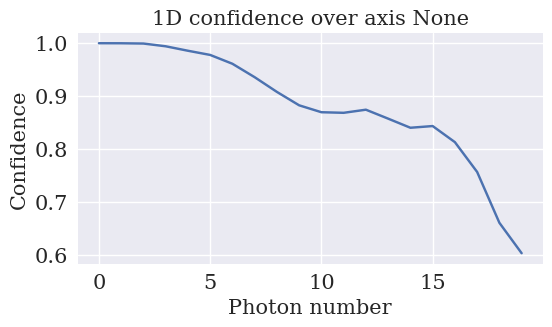

In [22]:
gm.plot_confidence_1d(expected_prob = None)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### PCA

In [23]:
# pca = PCA(n_components=1).fit(data_train)
# X_PCA = pca.transform(data_test)
X_PCA = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = PCA, 
   n_components = 1, 
   random_state = 42
)

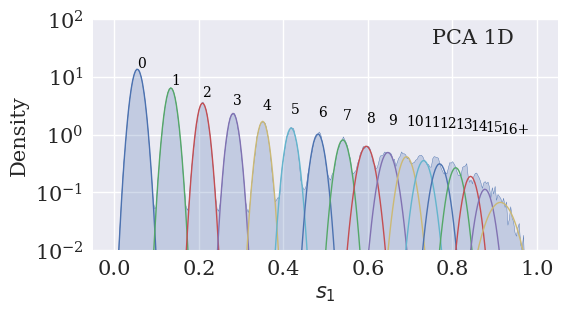

In [24]:
name_method = 'PCA 1D'
gm = gaussian_mixture(
   X_PCA[::SKIP],
   data_test,
   number_cluster = 17,
   cluster_iter = 5,
   means_init = get_means(name_method, PATH_INIT_MEANS),
   tol = 1e-4,
   info_sweep = 0,
   plot_sweep = False,
   latex = False
)

gm.plot_density(
   bw_adjust = 0.03,
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)

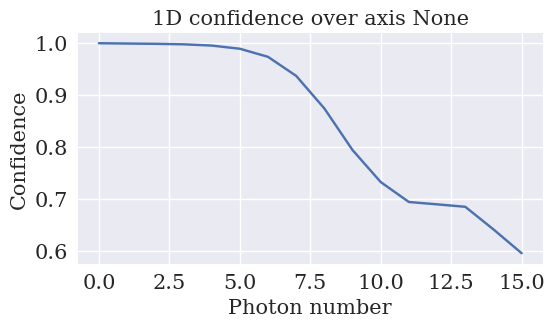

In [13]:
gm.plot_confidence_1d(expected_prob = None)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### UMAP

In [14]:
X_l_UMAP = sklearn_available(
   data_train, 
   data_test, 
   PATH_SAVE_LD+'/umap1d', 
   umap.UMAP, '100.npy', 
   n_components=1, 
   n_neighbors=100, 
   random_state=42
)

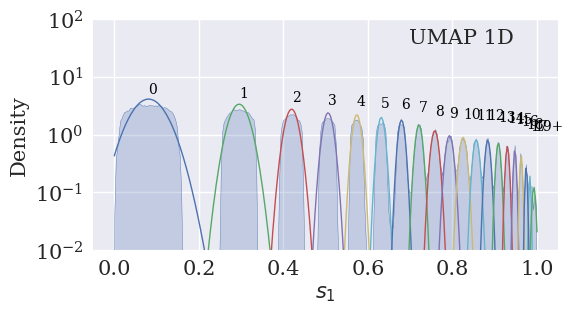

In [15]:
name_method = 'UMAP 1D'
gm = gaussian_mixture(
   X_low = X_l_UMAP[::SKIP],
   X_high = data_test,
   number_cluster = 20,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_INIT_MEANS),
   tol = 1e-4
)

gm.plot_density(
   bw_adjust = 0.03,
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)


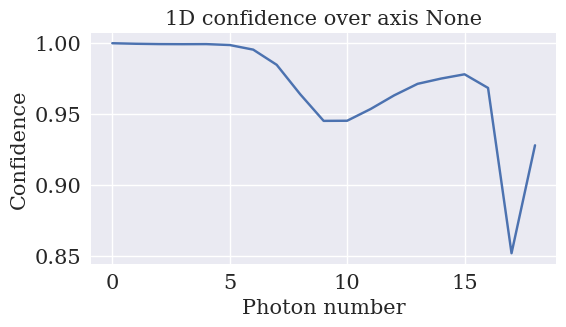

In [16]:
gm.plot_confidence_1d(expected_prob = None)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)